# <span style="color:#1111AA">Modulation: Phase modulation</span>

# Table of Contents

# 1. Overview

## 1.1. Introduction

Phase modulation encodes information as a time dependent phase factor of a carrier wave. The phase modulation can be added on purpose to transmit information, which is utilised in a wide range of radio wave based technologies, such as satellite TV, in the GSM grid and WiFi. 

Phase modulation can also be used to read out information about an unknown mechanism or source that modulates the laser field, which is the case for interferometers that are used to measure relative distances, for example gravitational wave detectors. A gravitational wave that passes by a gravitational wave detector will phase modulate the laser fields in the detector as it changes the path length of the field. The rest of the advanced technology is for converting and extracting the phase modulation signal as efficiently as possible, and for supressing noise. 

This session will introduce the basics of phase modulation, how we simulate it with FINESSE using the sideband picture.

## 1.2. Prerequisites and reading material

We recommend that you have done the following notebooks before starting this one:
* 01_Introduction
    * 01_Ipython_notebook
        * [01_Ipython_notebook](../../01_Introduction/01_Ipython_notebook/01_Ipython_notebook.ipynb)
    * 02_Finesse
        * [01_Introduction](../../01_Introduction/02_Finesse/01_Introduction.ipynb)
    * 03_Pykat
        * [01_Introduction](../../01_Introduction/03_Pykat/01_Introduction.ipynb)
        * [02_Plotting_Examples](../../01_Introduction/03_Pykat/02_Plotting_Examples.ipynb)

or have corresponding basic experience of Ipython notebooks, PyKat, and Finesse. The links above only works if you started ipython notebook in the top directory of this course.

**Reading material and references:**

[1] [A. Freise, K. Strain, D. Brown, and C. Bond, "Interferometer Techniques for Gravitational-Wave Detection", *Living Reviews in Relativity* **13**, 1 (2010)](http://arxiv.org/pdf/0909.3661v3). - Living review article (more like a book) on laser interferometry in the frequency domain for detecting gravitational waves, and FINESSE.

[2] [A. Freise, D. Brown, and C. Bond, "Finesse, Frequency domain INterferomEter Simulation SoftwarE"](http://kvasir.sr.bham.ac.uk/redmine/attachments/download/131/Finesse_2.0_manual.pdf). - FINESSE-manual

[3] [FINESSE syntax reference](http://www.gwoptics.org/finesse/reference/) - Useful online syntax reference for FINESSE. Also available in the Finesse manual [2], but this online version is updated more often.

## 1.3. After this session you will be able to...

* Something

# 2. Optical phase modulation

## 2.1. Importing packages

Importing python and PyKat packages that we will need, and setting up how to display figures.

In [1]:
import numpy as np                         # Importing numpy
import matplotlib                          # Importing matplotlib, so we can plot figures
import matplotlib.pyplot as plt                   
from pykat import finesse                  # Importing the pykat.finesse package
from pykat.commands import *               # Importing all packages in pykat.commands.
from IPython.display import display, HTML  # Allows us to display HTML.

# Telling the notebook to make plots inline.
%matplotlib inline      
# Initialises the PyKat plotting tool. Change the dpi value to adjust size of figures on your screen.
pykat.init_pykat_plotting(dpi=90)          

                                              ..-
    PyKat 1.0.0           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



## 2.2. Phase modulation in the time domain
A laser field that is phase modulated by a sinus function can be described by $E(t) = E_0\cos\big(2\pi f_\mathrm{c} t + \varphi_c + $<span style="color:Red">$m\sin(2\pi f_\mathrm{pm} t + \varphi_\mathrm{pm})$</span>$\big)$, i.e., it has a time dependent phase term, as shown in red. The *modulation frequency* $f_\mathrm{pm}$ determines how quickly the phase changes, the *modulation index* $m$ determines the amplitude of the phase oscillations, and the *modulation phase* $\varphi_\mathrm{pm}$ is a constant phase term.

We can see an example of phase modulation below, where the figure is generated by using a carrier frequency $f_c = 20$ Hz, a modulation frequency $f_{\mathrm{pm}} = 2$ Hz, and a modulation index $m=5$. Normally $f_{pm} << f_c$, and $m<<1$, but for visualising purposes we exaggerate both the modulation frequency and the modulation index in this example. Both the overall phase $\varphi_c$ and the modulation phase $\varphi_\mathrm{pm}$ are set to zero.

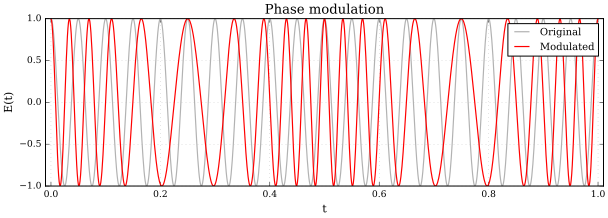

In [2]:
## Code for showing a phase modulated field ##

# Parameters
# --------------------------------------------------
t = np.linspace(0,1,1000)   # Time array
E0 = 1                      # Amplitude of the field.
fc = 20                     # Carrier freq
phi_c = 0                   # Phase of the field
fp = 2                      # Phase modulation freq
m = 5                       # Modulation index
phi_pm = 0                  # Phase modulation phase

# Computing the signals
# --------------------------------------------------
# Original signal
E = E0*np.cos(fc*2*np.pi*t + phi_c)
# Phase modulated signal
E_pm = E0*np.cos(fc*2*np.pi*t + phi_c + m*np.sin(fp*2*np.pi*t+phi_pm))

# Plotting
# --------------------------------------------------
fig = plt.figure(figsize=(10,3))
ax = plt.subplot(1,1,1)
ax.plot(t,E,'0.7', label='Original')
ax.plot(t,E_pm,'r',label='Modulated')
ax.set_xlabel('t')
ax.set_ylabel('E(t)')
ax.set_title('Phase modulation')
ax.set_xlim(-0.01,1.01)
ax.legend(loc=1,fontsize=10)
plt.show(fig)

<font size="2"> **Figure.** The figure shows a phase modulated field $E(t) = E_0\cos\big(2\pi f_\mathrm{c} t +$<span style="color:Red">$m\sin(2\pi f_\mathrm{pm} t)$</span>$\big)$ in red, and the original field $E(t) = E_0\cos (2\pi f_\mathrm{c} t)$ in grey.

In the figure above we can clearly see that (i) the phase of the modulated field oscillated around the original field, and (ii) that the amplitude is kept constant. These are two important characteristics of a purely phase modulated field.

## 2.3. Phase modulation in the sideband picture

We only give a brief explanation on Using complex notation, a phase modulated electric field at an arbitrary fixed point in space can be described by $E_\mathrm{pm}(t) = E_0\exp \Big(i\big( 2\pi f_\mathrm{c} t + m\cos(2\pi f_\mathrm{pm} t + \varphi_\mathrm{pm})\big) \Big)$, where the overall phase $\varphi_c$ has been included in the now complex amplitude $E_0$. The tricky factor $\exp \big( im\cos(2\pi f_\mathrm{pm} t + \varphi_\mathrm{pm} ) \big)$ can be Taylor expanded around $m=0$. For small modulation indiced $(m<<1)$, we can approximate the series well with only the first order terms of the Taylor series:

\begin{align}
E_\mathrm{pm}(t) &= E_0\exp \Big(i\big( 2\pi f_\mathrm{c} t + m\cos(2\pi f_\mathrm{pm} t + \varphi_\mathrm{pm})\big) \Big) \\ 
&\approx E_0\exp \big( 2\pi i f_\mathrm{c} t\big) \bigg[ 1 + \frac{i m}{2}\Big( \exp\big( -i(2\pi f_\mathrm{pm} t + \varphi_\mathrm{pm})\big) + \exp\big( i( 2\pi f_\mathrm{pm} t + \varphi_\mathrm{pm})\big) \Big) \bigg] \\
       &= a_0 \mathrm{e}^{2\pi i f_c t} + a_- \mathrm{e}^{2\pi i f_- t} + a_+ \mathrm{e}^{2\pi i f_+ t} ,
\end{align}

where $f_\pm = f_c \pm f_\mathrm{pm}$. Thus, the effect of a weak phase modulation (small $m$) is two new frequency components, one on each side of the carrier. We call these *sidebands* of the carrier. The stronger phase modulation, the more sideband pairs are needed to be taken into account. That is, we would need to add frequency components of $f_c \pm 2f_\mathrm{pm}$, $f_c \pm 3f_\mathrm{pm}$, $f_c \pm 4f_\mathrm{pm}$ and so on, as the modulation index $m$ increases.

For a more thorough explanation, see section 3.2 in the living review article [1].

## 2.4 Finesse example

<img src="phase_modulation.png" style="width: 400px;"/>

In this example we use a laser and an *Electro-Optic Modulator* (EOM, keyword `mod`) to show how the amplitude of the carrier and the sidebands varies with the modulation index $m$. The setup can be seen above. We use *amplitude detectors* (keyword `ad`) to look at the ampitude of the frequency components. Amplitude detectors does not exist, but a nice property of numerical models is that we can make impossible "measurements".

We start by bulding the base model:

In [3]:
basekat = finesse.kat()          # Initialising Finesse
basekat.verbose = False          # Tells Finesse to talk less

# Finesse code
code = """
## The optical system ##
l laser 1 0 n0                # 1 W laser with 0 offset wavelength (thus default 1064nm used)
s s1 1 n0 n1                  # Space from laser to mirror (1 m)
mod eom 1k 0.3 5 pm 0 n1 n2   # Modulator (f=1 kHz, m=0.3, 5 sideband pairs, phase modulation, 0 degree mod. phase)
s s2 1000 n2 n3               # Space from modulator to output (1 m)
"""

# Parsing the Finesse code
basekat.parseKatCode(code)

Now we add the amplitude detectors, and specify what we want to simulate, and run the simulation:

In [4]:
kat1 = deepcopy(basekat)

code = """
## Detectors ##
ad car 0 n3                   # Ampitude dector for the carrier (0 freq offset)
ad up1 1k n3                  # Ampitude dector for the first upper sideband (1 kHz freq offset)
ad up2 2k n3                  # Ampitude dector for the second upper sideband (2 kHz freq offset)
ad up3 3k n3                  # Ampitude dector for the third upper sideband (3 kHz freq offset)
ad up4 4k n3                  # Ampitude dector for the fourth upper sideband (4 kHz freq offset)

## Instructions ##
xaxis eom midx lin 0 6 200   # Varying the modulation index of the modulator between 0 and 1.
yaxis abs                     # Showing amplitude of the frequncy components.
"""

# Parsing the code and running the simulation
kat1.parseCommands(code)
out1 = kat1.run()

Plotting the simulation results:

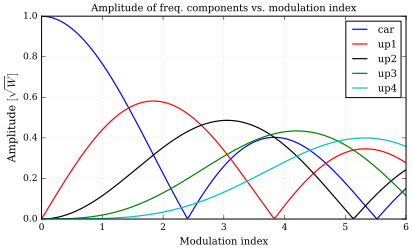

In [5]:
# Only plotting the 
fig1 = out1.plot(title = 'Amplitude of freq. components vs. modulation index', 
                 ylabel='Amplitude $[\sqrt{W}]$',  
                 xlabel='Modulation index')

In the figure above we see that as the modulation index increases from zero, more and more amplitude is taken from the carrier and fed into the sidebands, and the amplitudes oscillates as the modulation index grows larger. The sideband picture of a modulated field is a Taylor expansion around $m = 0$ using a truncated sum of Bessel-functions. 

# 3. Tasks

## 3.1. Conservation of energy in the Finesse model

Assuming we have a lossless EOM, the power going into the EOM must be the same as the power coming out. Use the example above as a base and modify it to show that the energy is conserved up to some modulation index. 

** Answer: **

# 4. Tasks with answers

## 4.1. Conservation of energy in the Finesse model

Assuming we have a lossless EOM, the power going into the EOM must be the same as the power coming out. Use the example above as a base and modify it to show that the energy is conserved up to some modulation index. 

** Answer: **

The important parts to remember here are (i) that we need to use the lower sidebands as well (which were excluded in the example above), and (ii) that we need to change the `yaxis` command to `abs:deg` to detect the complex amplitudes because we need to take the phase into account as well, not only the physical amplitude. Also, remember that amplitude in Finesse is defined as $\sqrt{W}$, thus to get the power we square the absolute value of the amplitude. We also add a photo diode to detect the power to see if there is a difference compared to square the absolute sum of amplitudes. 

In [143]:
# Copying our core model
kat2 = deepcopy(basekat)

# Adding detectors and instructions
code = """
## Detectors ##
ad car 0 n3                   # Ampitude dector for the carrier (0 freq offset)
ad up1 1k n3                  # Ampitude dector for the first upper sideband (1 kHz freq offset)
ad up2 2k n3                  # Ampitude dector for the second upper sideband (2 kHz freq offset)
ad up3 3k n3                  # Ampitude dector for the third upper sideband (3 kHz freq offset)
ad up4 4k n3                  # Ampitude dector for the fourth upper sideband (4 kHz freq offset)
ad up5 5k n3                  # Ampitude dector for the fourth upper sideband (4 kHz freq offset)

# Same as above, but for the lower sidebands
ad low1 -1k n3
ad low2 -2k n3  
ad low3 -3k n3
ad low4 -4k n3
ad low5 -5k n3

# Photo diode to detect the power directly
pd pow n3

## Instructions ##
xaxis eom midx lin 0 6 200   # Varying the modulation index of the modulator between 0 and 1.
yaxis abs:deg                 # Returns complex representation of the amplitudes
"""

# Parsing the code and running the simulation
kat2.parseKatCode(code)
out2 = kat2.run()

Now we compute the total power:

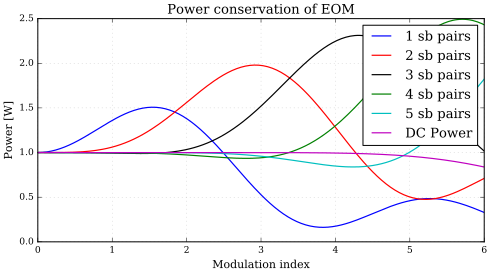

In [149]:
# Resulting fields and power
# ----------------
# With one sideband pair
E1 = (out2['car'] + out2['up1'] + out2['low1'])
P1 = np.abs(E1)**2
# With two sideband pairs
E2 = (out2['car'] + out2['up1'] + out2['up2'] + out2['low1'] + out2['low2'])
P2 = np.abs(E2)**2
# With three sideband pairs
E3 = (out2['car'] + out2['up1'] + out2['up2'] + out2['up3'] + 
      out2['low1'] + out2['low2'] + out2['low3'])
P3 = np.abs(E3)**2
# With four sideband pairs
E4 = (out2['car'] + out2['up1'] + out2['up2'] + out2['up3'] + out2['up4'] + 
      out2['low1'] + out2['low2'] + out2['low3'] + out2['low4'])
P4 = np.abs(E4)**2
# With five sideband pairs
E5 = (out2['car'] + out2['up1'] + out2['up2'] + out2['up3'] + out2['up4'] + out2['up5'] + 
      out2['low1'] + out2['low2'] + out2['low3'] + out2['low4'] + out2['low5'])
P5 = np.abs(E5)**2

# Plotting
# ---------
fig2 = plt.figure(figsize=(8,4))
ax = plt.subplot(1,1,1)
ax.plot(out2.x, P1, label='1 sb pairs')
ax.plot(out2.x, P2, label='2 sb pairs')
ax.plot(out2.x, P3, label='3 sb pairs')
ax.plot(out2.x, P4, label='4 sb pairs')
ax.plot(out2.x, P5, label='5 sb pairs')
ax.plot(out2.x, np.abs(out2['pow']), label='DC Power')
# Labels and legend
ax.set_title('Power conservation of EOM')
ax.set_ylabel('Power [W]')
ax.set_xlabel('Modulation index')
ax.legend(loc=1)
plt.show(fig2)

As wee see in the figure above, more and more sideband pairs need to be taken into account the higher the modulation index is. We can also see that even the photo diode that detects power directly fails on us for large modulation indices. However, for all simulations we do with phase modulation, the modulation index is safely below 1. 

# 5. Summary

In this session we have:
* used an electro-optic modulator to phase modulate a laser field
* seen that the modulated field can be represented by adding sidebands around the carrier
* investigated how many sideband pairs that are needed depending on the modulation index by looking at if the power converges.

In the [next session](02_Frequency_modulation.ipynb) we will investigate frequency modulation.